# Neuromatch Academy: Week 3, Day 2, Tutorial 1
# Neuronal Network Dynamics: Neural Rate Models

__Content creators:__ Qinglong Gu, Songtin Li, Arvind Kumar, John Murray, Julijana Gjorgjieva 

__Content reviewers:__  Maryam Vaziri-Pashkam, Ella Batty, Lorenzo Fontolan, Richard Gao, Spiros Chavlis, Michael Waskom


---
# Tutorial Objectives

The brain is a complex system, not because it is composed of a large number of diverse types of neurons, but mainly because of how neurons are connected to each other. The brain is indeed a network of highly specialized neuronal networks. 

The activity of a neural network constantly evolves in time. For this reason, neurons can be modeled as dynamical systems. The dynamical system approach is only one of the many modeling approaches that computational neuroscientists have developed (other points of view include information processing,  statistical models, etc.). 

How the dynamics of neuronal networks affect the representation and processing of information in the brain is an open question. However, signatures of altered brain dynamics present in many brain diseases (e.g., in epilepsy or Parkinson's disease) tell us that it is crucial to study network activity dynamics if we want to understand the brain.

In this tutorial, we will simulate and study one of the simplest models of biological neuronal networks. Instead of modeling and simulating individual excitatory neurons (e.g., LIF models that you implemented yesterday), we will treat them as a single homogeneous population and approximate their dynamics using a single one-dimensional equation describing the evolution of their average spiking rate in time.

In this tutorial, we will learn how to build a firing rate model of a single population of excitatory neurons. 

**Steps:**
- Write the equation for the firing rate dynamics of a 1D excitatory population.
- Visualize the response of the population as a function of parameters such as threshold level and gain, using the frequency-current (F-I) curve.
- Numerically simulate the dynamics of the excitatory population and find the fixed points of the system. 
- Investigate the stability of the fixed points by linearizing the dynamics around them.
 


---
# Setup

In [ ]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt       # root-finding algorithm

In [ ]:
# @title Figure Settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

In [ ]:
# @title Helper functions


def plot_fI(x, f):
  plt.figure(figsize=(6, 4))  # plot the figure
  plt.plot(x, f, 'k')
  plt.xlabel('x (a.u.)', fontsize=14)
  plt.ylabel('F(x)', fontsize=14)
  plt.show()


def plot_dr_r(r, drdt, x_fps=None):
  plt.figure()
  plt.plot(r, drdt, 'k')
  plt.plot(r, 0. * r, 'k--')
  if x_fps is not None:
    plt.plot(x_fps, np.zeros_like(x_fps), "ko", ms=12)
  plt.xlabel(r'$r$')
  plt.ylabel(r'$\frac{dr}{dt}$', fontsize=20)
  plt.ylim(-0.1, 0.1)


def plot_dFdt(x, dFdt):
  plt.figure()
  plt.plot(x, dFdt, 'r')
  plt.xlabel('x (a.u.)', fontsize=14)
  plt.ylabel('dF(x)', fontsize=14)
  plt.show()

`helper functions`:

*plot_fI*: 
plot x (xaxis) vs f(x) (yaxis)

*plot_dr_r*:
plot r (xaxis) vs dr/dt (yaxis)

*plot_dFdt*: 
plot x (xaxis) vs dF(x) (yaxis)

---
# Section 1: Neuronal network dynamics

Video available at https://youtube.com/watch?v=p848349hPyw


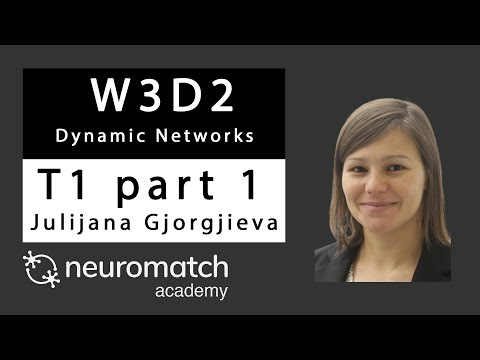

In [ ]:
# @title Video 1: Dynamic networks
from IPython.display import YouTubeVideo
video = YouTubeVideo(id="p848349hPyw", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)
video

# Summary of Video 1:

*learn how single neurons create network dynamics*

- single neurons can generate & represent information.
By using their combination of ion channels that operate on different timescales and complex morphologies
and understand the computations that these neurons can actually achieve.
- many neural circuits in the brain are not made up of single neurons,
but rather of interconnected populations of neurons
with diverse properties and synaptic dynamics.
How these single neurons can generate population on it or network dynamics

(a) studying rate models namely network models,
whereby the activity of donors and described using firing rates.
- describe the dynamics of these networks by focusing on the firing rate activity
- we will investigate
networks of neurons comprised of a single population of neurons that have similar properties 
That's why these these models are known as rate models. 
(b) expand the framework and introduce a second population, namely a population of inhibitory neurons that together with excitatory neurons generate interesting neural dynamics using the framework of two- dimensional dynamical systems; define the notion of fixed points and their stability in this two-dimensional system, as well as vector fields in a complimentary way to the system with a single population

Excitatory neurons that all code for the same
Stimulus feature and use the mathematical framework of dynamical systems to understand
Concepts like fi curves fixed points and their stability and vector fields
To understand how these networks generate dynamics and what this means. 

A feed-forward network is comprised of three different Ingredients.
first we have a layer of pre-synaptic neurons or inputs that we describe here by the vector u
We also have a single post-synaptic neuron. So this is a very simple feed-forward network
with a single post-synaptic neuron whose activity, whose firing rate is described by the variable V
This is a scalar
and the way this postsynaptic neuron generates activity is by integrating the presynaptic inputs u
weighted by some weight matrix "m" which gives us the third component in the feed-forward network
namely the strength of the synaptic weights or connection
between the presynaptic inputs and the postsynaptic neuron

Now to determine how this post-synaptic neuron generates a firing rate
We need to understand what the total input current is at this post-synaptic neuron
that it receives from the presynaptic neurons.
To do that, we assume that simply this postsynaptic neuron scales linearly the presynaptic input units
so that the total input current experienced by the postsynaptic neuron
is just a product or which of the individual weights M sub J times
The activity of the corresponding presynaptic unit U sub J
So then we can write a differential equation that tells us what the firing rate activity is of this postsynaptic unit V
We have a differential equation that consists of two parts first. We have a leak term
so this minus V that tells us upon the removal of a presynaptic input
What how the activity of this postsynaptic neuron will became time? 
So this current that it receives from the presynaptic
units that can also be written as the dot product between the weight vector and the input vector U
So we can extend this feed-forward network to include multiple
postsynaptic neurons V

What's the strength of the connection into a given postsynaptic neuron from a given presynaptic neuron?
- allows us to simplify the schematic a little bit where instead of this entire array of presynaptic units you that we
Had before we now just have a single
external vector 
input that goes into all of the postsynaptic units V
again, we can simplify this even further instead of considering this entire post synaptic array as effectively an array
or a vector of firing rates of postsynaptic neurons we can lump them together into a single population
So instead of having a vector of firing rates
we now have a single scalar which describes the firing rate of the entire population of neurons and we can do this if
We assume that all of these neurons have very similar properties that can be described by the same equation
So now we have an equation
for the entire population
This defines very naturally the concept of an fi curve namely R describes the firing rate of the population
and
It tells us how this so this non-linearity F tells us how the firing rate of the population
depends on the total input current that it receives
This is known as an F-I curve because for obvious reasons F stands for
Firing rate and I stands for Input current but in literature this is also known as the transfer function or the stimulus response
Function or even the tuning curve of the population here
We have taken a sigmoidal tuning curve or sigmoidal F-I curve described by this expression here
But depending on the system that you try to model this can
Have a very different shape and might not even be monotonically increasing like the sigmoid that we have considered here

there are two properties of this F-I curve :
1. threshold which tells us how much input current is needed to drive the
Population to fire with a given firing rate and 
2. gain which tells us how fast does the firing rate change
As you change the input current
These two can be varied. So of course we can increase the threshold

## Section 1.1: Dynamics of a single excitatory population

Individual neurons respond by spiking. When we average the spikes of neurons in a population, we can define the average firing activity of the population. In this model, we are interested in how the population-averaged firing varies as a function of time and network parameters. Mathematically, we can describe the firing rate dynamic as:

\begin{align}
\tau \frac{dr}{dt} &= -r + F(w\cdot r + I_{\text{ext}})  \quad\qquad (1)
\end{align}

$r(t)$ represents the average firing rate of the excitatory population at time $t$, $\tau$ controls the timescale of the evolution of the average firing rate, $w$ denotes the strength (synaptic weight) of the recurrent input to the population, $I_{\text{ext}}$ represents the external input, and the transfer function $F(\cdot)$ (which can be related to f-I curve of individual neurons described in the next sections) represents the population activation function in response to all received inputs.

To start building the model, please execute the cell below to initialize the simulation parameters.

In [ ]:
# @markdown *Execute this cell to set default parameters for a single excitatory population model*


def default_pars_single(**kwargs):
  pars = {}

  # Excitatory parameters
  pars['tau'] = 1.     # Timescale of the E population [ms]
  pars['a'] = 1.2      # Gain of the E population
  pars['theta'] = 2.8  # Threshold of the E population

  # Connection strength
  pars['w'] = 0.  # E to E, we first set it to 0

  # External input
  pars['I_ext'] = 0.

  # simulation parameters
  pars['T'] = 20.       # Total duration of simulation [ms]
  pars['dt'] = .1       # Simulation time step [ms]
  pars['r_init'] = 0.2  # Initial value of E

  # External parameters if any
  pars.update(kwargs)

  # Vector of discretized time points [ms]
  pars['range_t'] = np.arange(0, pars['T'], pars['dt'])

  return pars

You can now use:
- `pars = default_pars_single()` to get all the parameters, and then you can execute `print(pars)` to check these parameters. 
- `pars = default_pars_single(T=T_sim, dt=time_step)` to set new simulation time and time step
- To update an existing parameter dictionary, use `pars['New_para'] = value`

Because `pars` is a dictionary, it can be passed to a function that requires individual parameters as arguments using `my_func(**pars)` syntax.

## Section 1.2: F-I curves
In electrophysiology, a neuron is often characterized by its spike rate output in response to input currents. This is often called the **F-I** curve, denoting the output spike frequency (**F**) in response to different injected currents (**I**). We estimated this for an LIF neuron in yesterday's tutorial.

The transfer function $F(\cdot)$ in Equation $1$ represents the gain of the population as a function of the total input. The gain is often modeled as a sigmoidal function, i.e., more input drive leads to a nonlinear increase in the population firing rate. The output firing rate will eventually saturate for high input values. 

A sigmoidal $F(\cdot)$ is parameterized by its gain $a$ and threshold $\theta$.

$$ F(x;a,\theta) = \frac{1}{1+\text{e}^{-a(x-\theta)}} - \frac{1}{1+\text{e}^{a\theta}}  \quad(2)$$

The argument $x$ represents the input to the population. Note that the second term is chosen so that $F(0;a,\theta)=0$.

Many other transfer functions (generally monotonic) can be also used. Examples are the rectified linear function $ReLU(x)$ or the hyperbolic tangent $tanh(x)$.

### Exercise 1: Implement F-I curve 

Let's first investigate the activation functions before simulating the dynamics of the entire population. 

In this exercise, you will implement a sigmoidal **F-I** curve or transfer function $F(x)$, with gain $a$ and threshold level $\theta$ as parameters.

In [ ]:
def F(x, a, theta):
  """
  Population activation function.

  Args:
    x (float): the population input
    a (float): the gain of the function
    theta (float): the threshold of the function

  Returns:
    float: the population activation response F(x) for input x
  """
  #################################################
  ## TODO for students: compute f = F(x) ##
  # Fill out function and remove
  raise NotImplementedError("Student excercise: implement the f-I function")
  #################################################

  # Define the sigmoidal transfer function f = F(x)
  f = ...

  return f


pars = default_pars_single()  # get default parameters
x = np.arange(0, 10, .1)      # set the range of input

# Uncomment below to test your function
# f = F(x, pars['a'], pars['theta'])
# plot_fI(x, f)

In [ ]:
# to_remove solution
def F(x, a, theta):
  """
  Population activation function.

  Args:
    x (float): the population input
    a (float): the gain of the function
    theta (float): the threshold of the function

  Returns:
    float: the population activation response F(x) for input x
  """

  # Define the sigmoidal transfer function f = F(x)
  f = (1 + np.exp(-a * (x - theta)))**-1 - (1 + np.exp(a * theta))**-1

  return f


pars = default_pars_single()  # get default parameters
x = np.arange(0, 10, .1)      # set the range of input

# Uncomment below to test your function
f = F(x, pars['a'], pars['theta'])

with plt.xkcd():
  plot_fI(x, f)

### Interactive Demo: Parameter exploration of F-I curve
Here's an interactive demo that shows how the F-I curve changes for different values of the gain and threshold parameters. How do the gain and threshold parameters affect the F-I curve?

In [ ]:
# @title

# @markdown Make sure you execute this cell to enable the widget!


def interactive_plot_FI(a, theta):
  """
  Population activation function.

  Expecxts:
    a     : the gain of the function
    theta : the threshold of the function

  Returns:
    plot the F-I curve with give parameters
  """

  # set the range of input
  x = np.arange(0, 10, .1)
  plt.figure()
  plt.plot(x, F(x, a, theta), 'k')
  plt.xlabel('x (a.u.)', fontsize=14)
  plt.ylabel('F(x)', fontsize=14)
  plt.show()


_ = widgets.interact(interactive_plot_FI, a=(0.3, 3, 0.3), theta=(2, 4, 0.2))

In [ ]:
# to_remove explanation

"""
Discussion:

For the function we have chosen to model the F-I curve (eq 2),
- a determines the slope (gain) of the rising phase of the F-I curve
- theta determines the input at which the function F(x) reaches its mid-value (0.5).
That is, theta shifts the F-I curve along the horizontal axis.

For our neurons we are using in this tutorial:
- a controls the gain of the neuron population
- theta controls the threshold at which the neuron population starts to respond
""";

## Section 1.3: Simulation scheme of E dynamics

Because $F(\cdot)$ is a nonlinear function, the exact solution of Equation $1$ can not be determined via analytical methods. Therefore, numerical methods must be used to find the solution. In practice, the derivative on the left-hand side of Equation $1$ can be approximated using the Euler method on a time-grid of stepsize $\Delta t$:

\begin{align}
&\frac{dr}{dt} \approx \frac{r[k+1]-r[k]}{\Delta t} 
\end{align}
where $r[k] = r(k\Delta t)$. 

Thus,

$$\Delta r[k] = \frac{\Delta t}{\tau}[-r[k] + F(w\cdot r[k] + I_{\text{ext}}[k];a,\theta)]$$


Hence, Equation (1) is updated at each time step by:

$$r[k+1] = r[k] + \Delta r[k]$$


In [ ]:
# @markdown *Execute this cell to enable the single population rate model simulator: `simulate_single`*


def simulate_single(pars):
  """
  Simulate an excitatory population of neurons

  Args:
    pars   : Parameter dictionary

  Returns:
    rE     : Activity of excitatory population (array)

  Example:
    pars = default_pars_single()
    r = simulate_single(pars)
  """

  # Set parameters
  tau, a, theta = pars['tau'], pars['a'], pars['theta']
  w = pars['w']
  I_ext = pars['I_ext']
  r_init = pars['r_init']
  dt, range_t = pars['dt'], pars['range_t']
  Lt = range_t.size

  # Initialize activity
  r = np.zeros(Lt)
  r[0] = r_init
  I_ext = I_ext * np.ones(Lt)

  # Update the E activity
  for k in range(Lt - 1):
      dr = dt / tau * (-r[k] + F(w * r[k] + I_ext[k], a, theta))
      r[k+1] = r[k] + dr

  return r

help(simulate_single)

### Interactive Demo: Parameter Exploration of single population dynamics

Note that $w=0$, as in the default setting, means no recurrent input to the neuron population in Equation (1). Hence, the dynamics are entirely determined by the external input $I_{\text{ext}}$. Explore these dynamics in this interactive demo.

How does $r_{\text{sim}}(t)$ change with different $I_{\text{ext}}$ values? How does it change with different $\tau$ values? Investigate the relationship between $F(I_{\text{ext}}; a, \theta)$ and the steady value of $r(t)$. 

Note that, $r_{\rm ana}(t)$ denotes the analytical solution - you will learn how this is computed in the next section.

In [ ]:
# @title

# @markdown Make sure you execute this cell to enable the widget!

# get default parameters
pars = default_pars_single(T=20.)


def Myplot_E_diffI_difftau(I_ext, tau):
  # set external input and time constant
  pars['I_ext'] = I_ext
  pars['tau'] = tau

  # simulation
  r = simulate_single(pars)

  # Analytical Solution
  r_ana = (pars['r_init']
           + (F(I_ext, pars['a'], pars['theta'])
           - pars['r_init']) * (1. - np.exp(-pars['range_t'] / pars['tau'])))

  # plot
  plt.figure()
  plt.plot(pars['range_t'], r, 'b', label=r'$r_{\mathrm{sim}}$(t)', alpha=0.5,
           zorder=1)
  plt.plot(pars['range_t'], r_ana, 'b--', lw=5, dashes=(2, 2),
           label=r'$r_{\mathrm{ana}}$(t)', zorder=2)
  plt.plot(pars['range_t'],
           F(I_ext, pars['a'], pars['theta']) * np.ones(pars['range_t'].size),
           'k--', label=r'$F(I_{\mathrm{ext}})$')
  plt.xlabel('t (ms)', fontsize=16.)
  plt.ylabel('Activity r(t)', fontsize=16.)
  plt.legend(loc='best', fontsize=14.)
  plt.show()


_ = widgets.interact(Myplot_E_diffI_difftau, I_ext=(0.0, 10., 1.),
                     tau=(1., 5., 0.2))

In [ ]:
# to_remove explanation

"""
Discussion:

Given the choice of F-I curve (eq 2) and dynamics of the neuron population (eq. 1)
the neurons have two fixed points or steady-state responses irrespective of the input.
- Weak inputs to the neurons eventually result in the activity converging to zero
- Strong inputs to the neurons eventually result in the activity converging to max value

The time constant tau, does not affect the steady-state response but it determines
the time the neurons take to reach to their fixed point.
""";

## Think!
Above, we have numerically solved a system driven by a positive input. Yet, $r_E(t)$ either decays to zero or reaches a fixed non-zero value.
- Why doesn't the solution of the system "explode" in a finite time? In other words, what guarantees that $r_E$(t) stays finite? 
- Which parameter would you change in order to increase the maximum value of the response? 

*hint*:

1. Is the FI curve bounded?
2. Think of unbounded functions. 

In [ ]:
# to_remove explanation

"""
Discussion:

1) As the F-I curve is bounded between zero and one, the system doesn't explode.
The f-curve guarantees this property

2) One way to increase the maximum response is to change the f-I curve. For
example, the ReLU is an unbounded function, and thus will increase the overall maximal
response of the network.
""";

---
# Section 2: Fixed points of the single population system


Video available at https://youtube.com/watch?v=Ox3ELd1UFyo


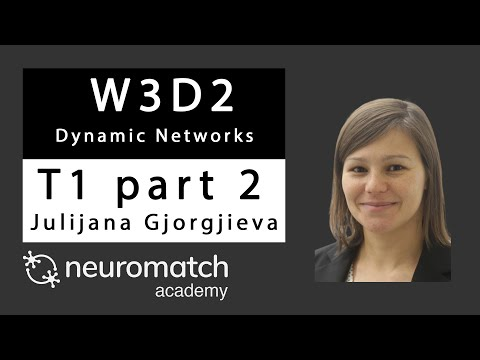

In [ ]:
# @title Video 2: Fixed point
from IPython.display import YouTubeVideo
video = YouTubeVideo(id="Ox3ELd1UFyo", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)
video

# Summary of Video 2:

- to understand not just how feed-forward networks generate interesting dynamics
and evolve their firing rates as a function of external input
but how recurrent networks
indeed which most of the networks in the brain are
also generate dynamics and interesting
firing rate
activities
- introduce the concept of fixed points, or steady states of these networks.
- the activity and the dynamics of this neural population is not just determined by the external input "I-external"
but also by recurrent connectivity that exists among all the neurons in this population. They can all be connected
All-to-all, or they can be connected with a given probability
like ten percent probability and so on, and this of course, depends on the properties of
The neurons that you're trying to model.
To represent this inner modeling framework, we're just going to assume that we have this connection "w"
That is the recurrent connection that effectively denotes how strongly the population is coupled to itself.
and this particular parameter will depend on the strength of the connection.
It will also depend on the nature of the connectivity, namely are the neurons connected all-to-all or with a particular probability
and so on. But, this now allows us to modify slightly
The equation for the firing rate activity of this population "r". So in addition to the external input, we also have
another term that contributes to the total input current received by neurons in this postsynaptic population
namely the product of the connection strength and the firing rate activity "r"
So, how can we understand the dynamics of these recurrent networks?
- Obviously, the dynamics of these recurrent networks depends on the strength of this recurrent connectivity
as well as the strength of the external input.
- We're going to use the mathematical framework of dynamical systems
to actually explain or to describe the dynamics of these networks
by using one-dimensional dynamical systems.
One-dimensional because here we just have a single population of neurons that
presumably have similar computational properties.
We're going to investigate the diversity of behaviors that such a network of neurons can generate as a
function of the connectivity strength and the external input
So, one of the the first things that we can do in this network is determine the fixed points
so mathematics tells us that every dynamical system has
fixed points that also have different names they're also known as equilibria, or steady states, and these fixed points
correspond to
values of the firing rate where the dynamics of the rate does not change at all
so we can do this by looking at the
equation that describes the activity of this neural population so dr/dt and
by definition, we're looking for values of "r" where these dynamics do not change in time
so this means that we're going to set the derivative of "r"
with respect to time equal to zero. 
- We need to also introduce the concept of a vector field or a phase plane
So indeed just by plotting the dr/dt as a function of "r"
we have effectively plotted the phase plane of this one-dimensional dynamical system
So this tells us not how the activity "r" changes in time; how the change in the activity with respect to time
depends on the values
of the firing rate of the population at that given time point
This now defines the notion of a phase plane from one dimensional dynamical system
so now we can
plot indeed the fixed points in this graphical representation in the phase plane of this 1 dimensional dynamical
system as we said, the fixed points correspond exactly to
the values of the population activity "r" where the dynamics do not change, and this is exactly the values where dr/dt is equal to 0

- investigate the fixed points of the dynamics of the equation that we just wrote down for a recurrent network; 
these fixed points exactly correspond to
values of the firing rate activity where nothing changes where the dynamics does not change
It doesn't increase or doesn't decrease it. Just stays at that point

- explore how to calculate and how to visualize these fixed points graphically
- determine how these fixed points depend on
parameters in the network, for example the connectivity "w"
the external Input "I-external", and the time constant. 


As you varied the two parameters in the last Interactive Demo, you noticed that, while at first the system output quickly changes, with time, it reaches its maximum/minimum value and does not change anymore. The value eventually reached by the system is called the **steady state** of the system, or the **fixed point**. Essentially, in the steady states the derivative with respect to time of the activity ($r$) is zero, i.e. $\displaystyle \frac{dr}{dt}=0$. 

We can find that the steady state of the Equation. (1) by setting $\displaystyle{\frac{dr}{dt}=0}$ and solve for $r$:

$$-r_{\text{steady}} + F(w\cdot r_{\text{steady}} + I_{\text{ext}};a,\theta) = 0, \qquad (3)$$

When it exists, the solution of Equation. (3) defines a **fixed point** of the dynamical system in Equation (1). Note that if $F(x)$ is nonlinear, it is not always possible to find an analytical solution, but the solution can be found via numerical simulations, as we will do later.

From the Interactive Demo, one could also notice that the value of $\tau$ influences how quickly the activity will converge to the steady state from its initial value. 

In the specific case of $w=0$, we can also analytically compute  the solution of Equation (1) (i.e., the thick blue dashed line) and deduce the role of $\tau$ in determining the convergence to the fixed point: 

$$\displaystyle{r(t) = \big{[}F(I_{\text{ext}};a,\theta) -r(t=0)\big{]} (1-\text{e}^{-\frac{t}{\tau}})} + r(t=0)$$ \\

We can now numerically calculate the fixed point with a root finding algorithm.

## Exercise 2: Visualization of the fixed points

When it is not possible to find the solution for Equation (3) analytically, a graphical approach can be taken. To that end, it is useful to plot $\displaystyle{\frac{dr}{dt}}$ as a function of $r$. The values of $r$ for which the plotted function crosses zero on the y axis correspond to fixed points. 

Here, let us, for example, set $w=5.0$ and $I^{\text{ext}}=0.5$. From Equation (1), you can obtain

$$\frac{dr}{dt} = [-r + F(w\cdot r + I^{\text{ext}})]\,/\,\tau $$

Then, plot the $dr/dt$ as a function of $r$, and check for the presence of fixed points. 

In [ ]:
def compute_drdt(r, I_ext, w, a, theta, tau, **other_pars):
  """Given parameters, compute dr/dt as a function of r.

  Args:
    r (1D array) : Average firing rate of the excitatory population
    I_ext, w, a, theta, tau (numbers): Simulation parameters to use
    other_pars : Other simulation parameters are unused by this function

  Returns
    drdt function for each value of r
  """
  #########################################################################
  # TODO compute drdt and disable the error
  raise NotImplementedError("Finish the compute_drdt function")
  #########################################################################

  # Calculate drdt
  drdt = ...

  return drdt


# Define a vector of r values and the simulation parameters
r = np.linspace(0, 1, 1000)
pars = default_pars_single(I_ext=0.5, w=5)

# Uncomment to test your function
# drdt = compute_drdt(r, **pars)
# plot_dr_r(r, drdt)

In [ ]:
# to_remove solution
def compute_drdt(r, I_ext, w, a, theta, tau, **other_pars):
  """Given parameters, compute dr/dt as a function of r.

  Args:
    r (1D array) : Average firing rate of the excitatory population
    I_ext, w, a, theta, tau (numbers): Simulation parameters to use
    other_pars : Other simulation parameters are unused by this function

  Returns
    drdt function for each value of r
  """
  # Calculate drdt
  drdt = (-r + F(w * r + I_ext, a, theta)) / tau

  return drdt


# Define a vector of r values and the simulation parameters
r = np.linspace(0, 1, 1000)
pars = default_pars_single(I_ext=0.5, w=5)

drdt = compute_drdt(r, **pars)
with plt.xkcd():
  plot_dr_r(r, drdt)

## Exercise 3: Fixed point calculation

We will now find the fixed points numerically. To do so, we need to specif initial values ($r_{\text{guess}}$) for the root-finding algorithm to start from. From the line $\displaystyle{\frac{dr}{dt}}$ plotted above in Exercise 2, initial values can be chosen as a set of values close to where the line crosses zero on the y axis (real fixed point).

The next cell defines three helper functions that we will use:

- `my_fp_single(r_guess, **pars)` uses a root-finding algorithm to locate a fixed point near a given initial value
- `check_fp_single(x_fp, **pars)`, verifies that the values of $r_{\rm fp}$ for which $\displaystyle{\frac{dr}{dt}} = 0$ are the true fixed points
- `my_fp_finder(r_guess_vector, **pars)` accepts an array of initial values and finds the same number of fixed points, using the above two functions

In [ ]:
# @markdown *Execute this cell to enable the fixed point functions*

def my_fp_single(r_guess, a, theta, w, I_ext, **other_pars):
  """
  Calculate the fixed point through drE/dt=0

  Args:
    r_guess  : Initial value used for scipy.optimize function
    a, theta, w, I_ext : simulation parameters

  Returns:
    x_fp    : value of fixed point
  """
  # define the right hand of E dynamics
  def my_WCr(x):
    r = x
    drdt = (-r + F(w * r + I_ext, a, theta))
    y = np.array(drdt)

    return y

  x0 = np.array(r_guess)
  x_fp = opt.root(my_WCr, x0).x.item()

  return x_fp


def check_fp_single(x_fp, a, theta, w, I_ext, mytol=1e-4, **other_pars):
  """
   Verify |dr/dt| < mytol

  Args:
    fp      : value of fixed point
    a, theta, w, I_ext: simulation parameters
    mytol   : tolerance, default as 10^{-4}

  Returns :
    Whether it is a correct fixed point: True/False
  """
  # calculate Equation(3)
  y = x_fp - F(w * x_fp + I_ext, a, theta)

  # Here we set tolerance as 10^{-4}
  return np.abs(y) < mytol


def my_fp_finder(pars, r_guess_vector, mytol=1e-4):
  """
  Calculate the fixed point(s) through drE/dt=0

  Args:
    pars    : Parameter dictionary
    r_guess_vector  : Initial values used for scipy.optimize function
    mytol   : tolerance for checking fixed point, default as 10^{-4}

  Returns:
    x_fps   : values of fixed points

  """
  x_fps = []
  correct_fps = []
  for r_guess in r_guess_vector:
    x_fp = my_fp_single(r_guess, **pars)
    if check_fp_single(x_fp, **pars, mytol=mytol):
      x_fps.append(x_fp)

  return x_fps

help(my_fp_finder)

In [ ]:
r = np.linspace(0, 1, 1000)
pars = default_pars_single(I_ext=0.5, w=5)
drdt = compute_drdt(r, **pars)

#############################################################################
# TODO for students:
# Define initial values close to the intersections of drdt and y=0
# (How many initial values? Hint: How many times do the two lines intersect?)
# Calculate the fixed point with these initial values and plot them
#############################################################################
r_guess_vector = [...]

# Uncomment to test your values
# x_fps = my_fp_finder(pars, r_guess_vector)
# plot_dr_r(r, drdt, x_fps)

In [ ]:
# to_remove solution
r = np.linspace(0, 1, 1000)
pars = default_pars_single(I_ext=0.5, w=5)
drdt = compute_drdt(r, **pars)

r_guess_vector = [0, .4, .9]

x_fps = my_fp_finder(pars, r_guess_vector)
with plt.xkcd():
  plot_dr_r(r, drdt, x_fps)

## Interactive Demo: fixed points as a function of recurrent and external inputs.

You can now explore how the previous plot changes when the recurrent coupling $w$ and the external input $I_{\text{ext}}$ take different values. How does the number of fixed points change?

In [ ]:
# @title

# @markdown Make sure you execute this cell to enable the widget!


def plot_intersection_single(w, I_ext):
  # set your parameters
  pars = default_pars_single(w=w, I_ext=I_ext)

  # find fixed points
  r_init_vector = [0, .4, .9]
  x_fps = my_fp_finder(pars, r_init_vector)

  # plot
  r = np.linspace(0, 1., 1000)
  drdt = (-r + F(w * r + I_ext, pars['a'], pars['theta'])) / pars['tau']

  plot_dr_r(r, drdt, x_fps)

_ = widgets.interact(plot_intersection_single, w=(1, 7, 0.2),
                     I_ext=(0, 3, 0.1))

In [ ]:
# to_remove explanation

"""
Discussion:

The fixed points of the single excitatory neuron population are determined by both
recurrent connections w and external input I_ext. In a previous interactive demo
we saw how the system showed two different steady-states when w = 0. But when w
doe not equal 0, for some range of w the system shows three fixed points (the middle
one being unstable) and the steady state depends on the initial conditions (i.e.
r at time zero.).

More on this will be explained in the next section.
""";

---
# Summary

In this tutorial, we have investigated the dynamics of a rate-based single population of neurons.

We learned about:
- The effect of the input parameters and the time constant of the network on the dynamics of the population.
- How to find the fixed point(s) of the system.

Next, we have two Bonus, but important concepts in dynamical system analysis and simulation. If you have time left, watch the next video and proceed to solve the exercises. You will learn:

- How to determine the stability of a fixed point by linearizing the system.
- How to add realistic inputs to our model.

---
# Bonus 1: Stability of a fixed point

Video available at https://youtube.com/watch?v=KKMlWWU83Jg


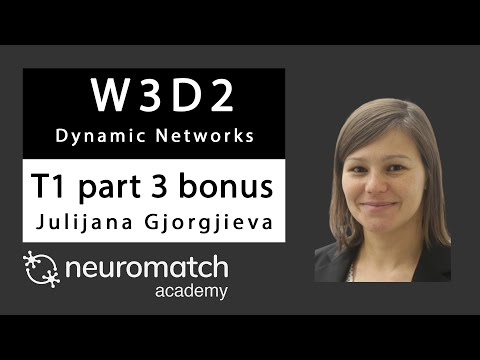

In [3]:
# @title Video 3: Stability of fixed points
from IPython.display import YouTubeVideo
video = YouTubeVideo(id="KKMlWWU83Jg", width=854, height=480, fs=1)
print("Video available at https://youtube.com/watch?v=" + video.id)
video

# Summary of Video 3:

- how to find the stability of fixed points
- So the phase plane allows us to visualize the dynamics of change of the population activity 'R' as a function of time.
As a function of the activity of this neural population itself, 'R.'
So, rather than plotting R versus T, seeing how the activity changes in time, here
we are plotting the change in R
as a function of T
- define the concept now of
flow in this phase plane that tells us whether the dynamics will increase or decrease in time.
- change in the activity versus time was positive or negative, so in
regions of this phase plane where the derivative was positive, where dr/dt was bigger than zero,
the flow of the
dynamics was to the right meaning that a population activity R will increase in time and
vice-versa in regions where this derivative dr/dt was negative. The flow was to the left meaning that the population
activity R will decrease in time.
- We also define the fixed points of the dynamics by setting the derivative dR/dT equal to zero.
- However, we can also determine the stability of these fixed points in a mathematical or an algebraic way by actually looking at
the equations for how a small perturbation of the activity around each fixed point will evolve in time.
So in order to do this
we have to look at how this perturbation will behave locally around the fixed point. So
by linearizing
the dynamics of the activity of the population around each of the fixed points.
So we effectively have to consider the tangents of this curve
and, which are indicated here with with the gray lines, and we have to see whether then this local
perturbation will be amplified
in which case the activity will go away from the fixed point or it will decay to zero in which case the activity will converge
back to the fixed point which is indicative of a stable fixed point.
- So the question is how do such small perturbations of the activity around each of the fixed points
behave? Namely, do they grow or do they decay in time?
	
- study a two dimensional dynamical system,
because we investigate networks with two populations of excitatory and inhibitory neurons.
- So we consider two cases: the first case is when lambda is negative,
so then the solution is just an exponential with a negative exponent which, as you know, decays in time.
So this means that the perturbation will completely decay in time, meaning that the activity around
which was the fixed point that was perturbed will actually converge just to the fixed point,
so this determines that the fixed point is stable.
So this is the case, indeed, for the two fixed points that we
identified as stable using the graphical analysis namely the one with the low and the one with the high value.
On the other hand if this exponent is positive,
that means that the perturbation will grow in time because now the
solution for the perturbation epsilon will be an exponential with a positive exponent that will obviously blow up.
So this means that the activity will grow further and further away from the fixed point and
therefore the fixed point is defined to be unstable.
So this is the case for the fixed point of this intermediate value that we determined earlier in the graphical way.

- visualize the activity of the population, not in the phase plane where we showed dr/dt
versus R, but in the more traditional way mainly to visualize how the activity changes in time.

- determine the stability of the
fixed points, one a graphical way which really helps us
determine the stability simply by looking at the direction of flow
of the vector field in the phase plane.
Fixed points are stable if the trajectories flow towards them and if they flow out of them, then the fixed points are unstable.
We also derived an analytical way that allowed us to
effectively
perturb the activity around the fixed point and derive
using linearization techniques
a differential equation that told us whether the perturbation will grow or decay in time.

- find the fixed points and you will determine
their stability both graphically and algebraically.
- simulate a more interesting biological scenario where the external input is not just static but is also noisy and random.


#### Initial values and trajectories

Here, let us first set $w=5.0$ and $I_{\text{ext}}=0.5$, and investigate the dynamics of $r(t)$ starting with different initial values $r(0) \equiv r_{\text{init}}$. We will plot the trajectories of $r(t)$ with $r_{\text{init}} = 0.0, 0.1, 0.2,..., 0.9$.

In [ ]:
# @markdown Execute this cell to see the trajectories!

pars = default_pars_single()
pars['w'] = 5.0
pars['I_ext'] = 0.5

plt.figure(figsize=(8, 5))
for ie in range(10):
  pars['r_init'] = 0.1 * ie  # set the initial value
  r = simulate_single(pars)  # run the simulation

  # plot the activity with given initial
  plt.plot(pars['range_t'], r, 'b', alpha=0.1 + 0.1 * ie,
           label=r'r$_{\mathrm{init}}$=%.1f' % (0.1 * ie))

plt.xlabel('t (ms)')
plt.title('Two steady states?')
plt.ylabel(r'$r$(t)')
plt.legend(loc=[1.01, -0.06], fontsize=14)
plt.show()

## Interactive Demo: dynamics as a function of the initial value

Let's now set $r_{\rm init}$ to a value of your choice in this demo. How does the solution change? What do you observe?

In [ ]:
# @title

# @markdown Make sure you execute this cell to enable the widget!

pars = default_pars_single(w=5.0, I_ext=0.5)

def plot_single_diffEinit(r_init):
  pars['r_init'] = r_init
  r = simulate_single(pars)

  plt.figure()
  plt.plot(pars['range_t'], r, 'b', zorder=1)
  plt.plot(0, r[0], 'bo', alpha=0.7, zorder=2)
  plt.xlabel('t (ms)', fontsize=16)
  plt.ylabel(r'$r(t)$', fontsize=16)
  plt.ylim(0, 1.0)
  plt.show()


_ = widgets.interact(plot_single_diffEinit, r_init=(0, 1, 0.02))

In [ ]:
# to_remove explanation
"""
Discussion:

To better appreciate what is happening here, you should go back to the previous
interactive demo. Set the w = 5 and I_ext = 0.5.

You will find that there are three fixed points of the system for these values of
w and I_ext. Now, choose the initial value in this demo and see in which direction
the system output moves. When r_init is in the vicinity of the leftmost fixed points
it moves towards the left most fixed point. When r_init is in the vicinity of the
rightmost fixed points it moves towards the rightmost fixed point.
""";

### Stability analysis via linearization of the dynamics

Just like Equation $1$ in the case ($w=0$) discussed above, a generic linear system 
$$\frac{dx}{dt} = \lambda (x - b),$$ 
has a fixed point for $x=b$. The analytical solution of such a system can be found to be:
$$x(t) = b + \big{(} x(0) - b \big{)} \text{e}^{\lambda t}.$$ 
Now consider a small perturbation of the activity around the fixed point: $x(0) = b+ \epsilon$, where $|\epsilon| \ll 1$. Will the perturbation $\epsilon(t)$ grow with time or will it decay to the fixed point? The evolution of the perturbation with time can be written, using the analytical solution for $x(t)$, as:
 $$\epsilon (t) = x(t) - b = \epsilon \text{e}^{\lambda t}$$

- if $\lambda < 0$, $\epsilon(t)$ decays to zero, $x(t)$ will still converge to $b$ and the fixed point is "**stable**".

- if $\lambda > 0$, $\epsilon(t)$ grows with time, $x(t)$ will leave the fixed point $b$ exponentially, and the fixed point is, therefore, "**unstable**" .

### Compute the stability of Equation $1$

Similar to what we did in the linear system above, in order to determine the stability of a fixed point $r^{*}$ of the excitatory population dynamics, we perturb Equation (1) around $r^{*}$ by $\epsilon$, i.e. $r = r^{*} + \epsilon$. We can plug in Equation (1) and obtain the equation determining the time evolution of the perturbation $\epsilon(t)$:

\begin{align}
\tau \frac{d\epsilon}{dt} \approx -\epsilon + w F'(w\cdot r^{*} + I_{\text{ext}};a,\theta) \epsilon 
\end{align}

where $F'(\cdot)$ is the derivative of the transfer function $F(\cdot)$. We can rewrite the above equation as:

\begin{align}
\frac{d\epsilon}{dt} \approx \frac{\epsilon}{\tau }[-1 + w F'(w\cdot r^* + I_{\text{ext}};a,\theta)] 
\end{align}

That is, as in the linear system above, the value of

$$\lambda = [-1+ wF'(w\cdot r^* + I_{\text{ext}};a,\theta)]/\tau \qquad (4)$$

determines whether the perturbation will grow or decay to zero, i.e., $\lambda$ defines the stability of the fixed point. This value is called the **eigenvalue** of the dynamical system.

## Exercise 4: Compute $dF$

The derivative of the sigmoid transfer function is:
\begin{align} 
\frac{dF}{dx} & = \frac{d}{dx} (1+\exp\{-a(x-\theta)\})^{-1}  \\
& = a\exp\{-a(x-\theta)\} (1+\exp\{-a(x-\theta)\})^{-2}. \qquad (5)
\end{align}

Let's now find the expression for the derivative $\displaystyle{\frac{dF}{dx}}$ in the following cell and plot it.

In [ ]:
def dF(x, a, theta):
  """
  Population activation function.

  Args:
    x     : the population input
    a     : the gain of the function
    theta : the threshold of the function

  Returns:
    dFdx  : the population activation response F(x) for input x
  """

  ###########################################################################
  # TODO for students: compute dFdx ##
  raise NotImplementedError("Student excercise: compute the deravitive of F")
  ###########################################################################

  # Calculate the population activation
  dFdx = ...

  return dFdx


pars = default_pars_single()  # get default parameters
x = np.arange(0, 10, .1)      # set the range of input

# Uncomment below to test your function
# df = dF(x, pars['a'], pars['theta'])
# plot_dFdt(x, df)

In [ ]:
# to_remove solution
def dF(x, a, theta):
  """
  Population activation function.

  Args:
    x     : the population input
    a     : the gain of the function
    theta : the threshold of the function

  Returns:
    dFdx  : the population activation response F(x) for input x
  """

  # Calculate the population activation
  dFdx = a * np.exp(-a * (x - theta)) * (1 + np.exp(-a * (x - theta)))**-2

  return dFdx


pars = default_pars_single()  # get default parameters
x = np.arange(0, 10, .1)      # set the range of input

df = dF(x, pars['a'], pars['theta'])

with plt.xkcd():
  plot_dFdt(x, df)

## Exercise 5: Compute eigenvalues

As discussed above, for the case with $w=5.0$ and $I_{\text{ext}}=0.5$, the system displays **three** fixed points. However, when we simulated the dynamics and varied the initial conditions $r_{\rm init}$, we could only obtain **two** steady states. In this exercise, we will now check the stability of each of the three fixed points by calculating the corresponding eigenvalues with the function `eig_single`. Check the sign of each eigenvalue (i.e., stability of each fixed point). How many of the fixed points are stable?

Note that the expression of the eigenvalue at fixed point $r^*$
$$\lambda = [-1+ wF'(w\cdot r^* + I_{\text{ext}};a,\theta)]/\tau$$

In [ ]:
def eig_single(fp, tau, a, theta, w, I_ext, **other_pars):
  """
  Args:
    fp   : fixed point r_fp
    tau, a, theta, w, I_ext : Simulation parameters

  Returns:
    eig : eigevalue of the linearized system
  """
  #####################################################################
  ## TODO for students: compute eigenvalue and disable the error
  raise NotImplementedError("Student excercise: compute the eigenvalue")
  ######################################################################
  # Compute the eigenvalue
  eig = ...

  return eig


# Find the eigenvalues for all fixed points of Exercise 2
pars = default_pars_single(w=5, I_ext=.5)
r_guess_vector = [0, .4, .9]
x_fp = my_fp_finder(pars, r_guess_vector)

# Uncomment below lines after completing the eig_single function.

# for fp in x_fp:
#   eig_fp = eig_single(fp, **pars)
#   print(f'Fixed point1 at {fp:.3f} with Eigenvalue={eig_fp:.3f}')

**SAMPLE OUTPUT**

```
Fixed point1 at 0.042 with Eigenvalue=-0.583
Fixed point2 at 0.447 with Eigenvalue=0.498
Fixed point3 at 0.900 with Eigenvalue=-0.626
```

In [ ]:
# to_remove solution
def eig_single(fp, tau, a, theta, w, I_ext, **other_pars):
  """
  Args:
    fp   : fixed point r_fp
    tau, a, theta, w, I_ext : Simulation parameters

  Returns:
    eig : eigevalue of the linearized system
  """
  # Compute the eigenvalue
  eig = (-1. + w * dF(w * fp + I_ext, a, theta)) / tau

  return eig


# Find the eigenvalues for all fixed points of Exercise 2
pars = default_pars_single(w=5, I_ext=.5)
r_guess_vector = [0, .4, .9]
x_fp = my_fp_finder(pars, r_guess_vector)

for fp in x_fp:
  eig_fp = eig_single(fp, **pars)
  print(f'Fixed point1 at {fp:.3f} with Eigenvalue={eig_fp:.3f}')

## Think! 
Throughout the tutorial, we have assumed $w> 0 $, i.e., we considered a single population of **excitatory** neurons. What do you think will be the behavior of a population of inhibitory neurons, i.e., where $w> 0$ is replaced by $w< 0$? 

*Hint*:

1. Go back to the interactive demo and try the values that'll help answer the question. How many fixed points can be observed?

In [ ]:
# to_remove explanation

"""
Discussion:

You can check this by going back the second last interactive demo and set the
weight to w<0. You will notice that the system has only one fixed point and that
is at zero value. For this particular dynamics, the system will eventually converge
to zero. But try it out.
""";

---
# Bonus 2: Noisy input drives the transition between two stable states



## Ornstein-Uhlenbeck (OU) process

As discussed in several previous tutorials, the OU process is usually used to generate a noisy input into the neuron. The OU input $\eta(t)$ follows: 

$$\tau_\eta \frac{d}{dt}\eta(t) = -\eta (t) + \sigma_\eta\sqrt{2\tau_\eta}\xi(t)$$

Execute the following function `my_OU(pars, sig, myseed=False)` to generate an OU process.

In [ ]:
# @title OU process `my_OU(pars, sig, myseed=False)`

# @markdown Make sure you execute this cell to visualize the noise!


def my_OU(pars, sig, myseed=False):
  """
  A functions that generates Ornstein-Uhlenback process

  Args:
    pars       : parameter dictionary
    sig        : noise amplitute
    myseed     : random seed. int or boolean

  Returns:
    I          : Ornstein-Uhlenbeck input current
  """

  # Retrieve simulation parameters
  dt, range_t = pars['dt'], pars['range_t']
  Lt = range_t.size
  tau_ou = pars['tau_ou']  # [ms]

  # set random seed
  if myseed:
      np.random.seed(seed=myseed)
  else:
      np.random.seed()

  # Initialize
  noise = np.random.randn(Lt)
  I_ou = np.zeros(Lt)
  I_ou[0] = noise[0] * sig

  # generate OU
  for it in range(Lt - 1):
    I_ou[it + 1] = (I_ou[it]
                    + dt / tau_ou * (0. - I_ou[it])
                    + np.sqrt(2 * dt / tau_ou) * sig * noise[it + 1])

  return I_ou


pars = default_pars_single(T=100)
pars['tau_ou'] = 1.  # [ms]
sig_ou = 0.1
I_ou = my_OU(pars, sig=sig_ou, myseed=2020)
plt.figure(figsize=(10, 4))
plt.plot(pars['range_t'], I_ou, 'r')
plt.xlabel('t (ms)')
plt.ylabel(r'$I_{\mathrm{OU}}$')
plt.show()

## Example: Up-Down transition

In the presence of two or more fixed points, noisy inputs can drive a transition between the fixed points! Here, we stimulate an E population for 1,000 ms applying OU inputs.

In [ ]:
# @title Simulation of an E population with OU inputs

# @markdown Make sure you execute this cell to spot the Up-Down states!

pars = default_pars_single(T=1000)
pars['w'] = 5.0
sig_ou = 0.7
pars['tau_ou'] = 1.  # [ms]
pars['I_ext'] = 0.56 + my_OU(pars, sig=sig_ou, myseed=2020)

r = simulate_single(pars)

plt.figure(figsize=(10, 4))
plt.plot(pars['range_t'], r, 'b', alpha=0.8)
plt.xlabel('t (ms)')
plt.ylabel(r'$r(t)$')
plt.show()